In [1]:
%load_ext autoreload
%autoreload 2

In [86]:
import os
from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution
import beamline34IDC.optimization.common as opt_common
from aps_ai.beamline34IDC.optimization.scipy_nelder_mead import ScipyOptimizer
from aps_ai.beamline34IDC.optimization.skopt_gp import SkoptGaussianProcessOptimizer, SkoptDiscreteGPOptimizer
from aps_ai.beamline34IDC.optimization.display_utils import LivePlotCallback

import beamline34IDC.optimization.movers as movers
from aps_ai.beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import glob
import shutil

In [3]:
%matplotlib inline

In [5]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

5669


In [6]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [7]:
os.mkdir(temp_work_dir)

In [13]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat') + glob.glob(f'{orig_work_dir}/*.ini')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [14]:
os.chdir(temp_work_dir)

In [15]:
input_beam_path = "primary_optics_system_beam.dat"

In [18]:
move_motors = ['hkb_1']

In [19]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [97]:
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

In [98]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

[0.2500515]


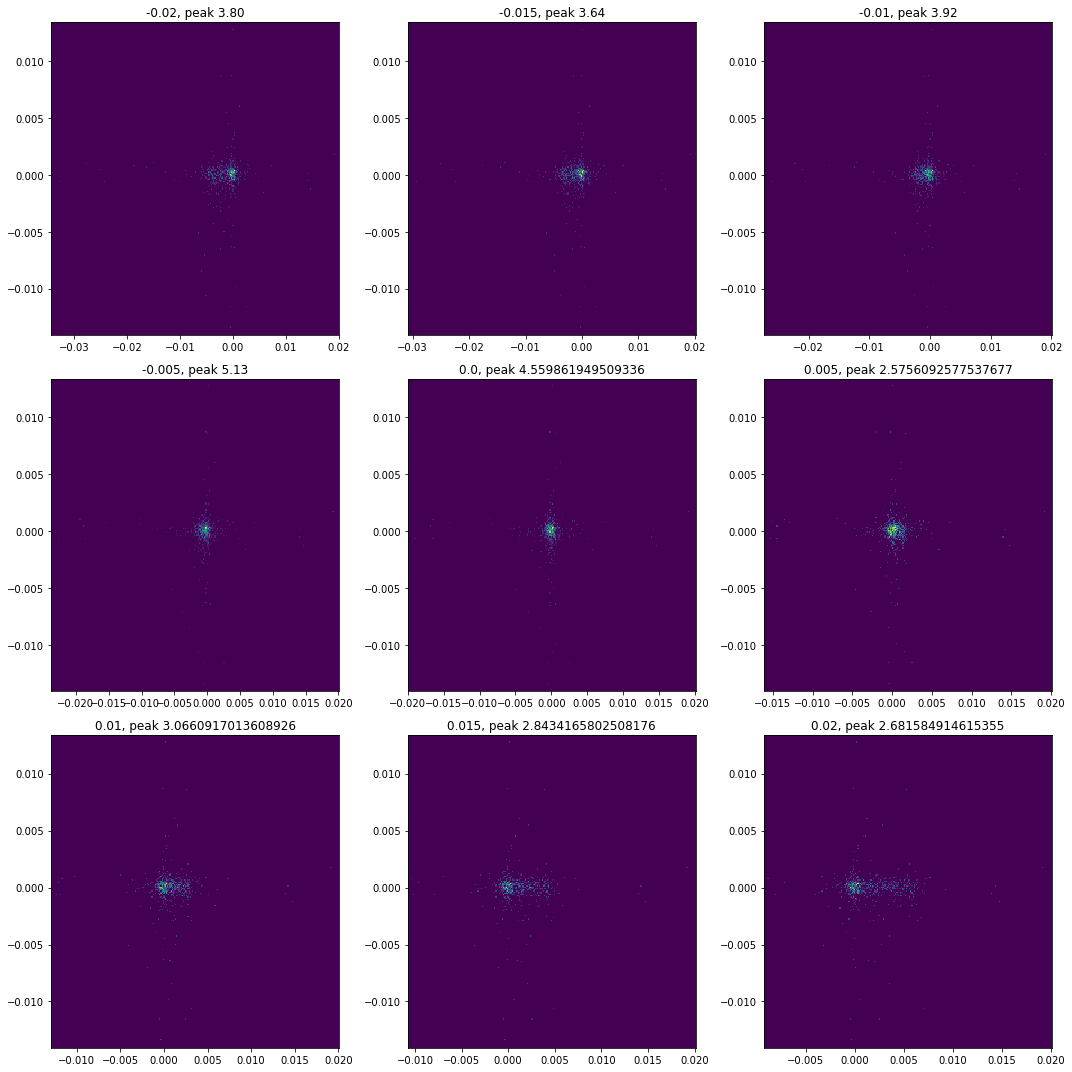

In [100]:
fig, axs = plt.subplots(3, 3, figsize=[15, 15])
axs = axs.flatten()

m = 0.005

for i in range(5):
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions + m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 + i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    pk = dw.get_parameter('peak_intensity')
    axs[4 + i].set_title(f'{m * i}, peak {pk}')
    
    if i == 0: continue
    
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions - m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 - i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    
    pk = dw.get_parameter('peak_intensity')
    axs[4 - i].set_title(f'{-m * i}, peak {pk:2.2f}')
plt.tight_layout()
    
    

  0%|          | 0/5 [00:00<?, ?it/s]

Random guess [-0.0047173391450092365] has loss 0.0030276775325595337
Initial motor position is [0.24533416]
Initial loss is 0.0030276775325595337
motors ['hkb_1'] trans [-0.00647778] current loss 0.0057826301605525


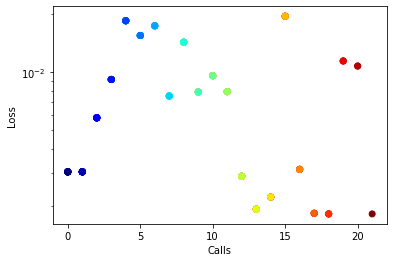

motors ['hkb_1'] trans [0.02264697] current loss 0.009155746763294852
motors ['hkb_1'] trans [-0.04408353] current loss 0.018502918936717395
motors ['hkb_1'] trans [-0.03465775] current loss 0.015505653615335818
motors ['hkb_1'] trans [-0.04063128] current loss 0.017410800237561218
motors ['hkb_1'] trans [0.01485296] current loss 0.00751058378524745
motors ['hkb_1'] trans [-0.03090639] current loss 0.014315395758622021
motors ['hkb_1'] trans [0.01595601] current loss 0.007882852413859841
motors ['hkb_1'] trans [0.02436393] current loss 0.009573548963415009
motors ['hkb_1'] trans [-0.01241284] current loss 0.007916370137680585
motors ['hkb_1'] trans [0.00038308] current loss 0.0028726007804549215
motors ['hkb_1'] trans [0.00328765] current loss 0.0019368577938135702
motors ['hkb_1'] trans [0.00409045] current loss 0.0022381996491737137
motors ['hkb_1'] trans [0.05] current loss 0.019524827330307287
motors ['hkb_1'] trans [0.00613422] current loss 0.0031192596278537934
motors ['hkb_1'] t

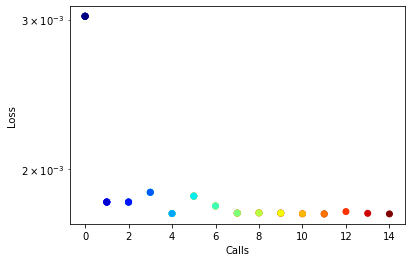

[ final_simplex: (array([[0.00287797],
       [0.00287797]]), array([0.00177324, 0.00177338]))
           fun: 0.0017732378069444945
       message: 'Optimization terminated successfully.'
          nfev: 13
           nit: 6
        status: 0
       success: True
             x: array([0.00287797])]


 20%|██        | 1/5 [01:03<04:14, 63.51s/it]

Test 0 success True
Random guess [0.011725704300086931] has loss 0.008052309470613243
Initial motor position is [0.2617772]
Initial loss is 0.008052309470613243
motors ['hkb_1'] trans [0.02457916] current loss 0.01168835979570961


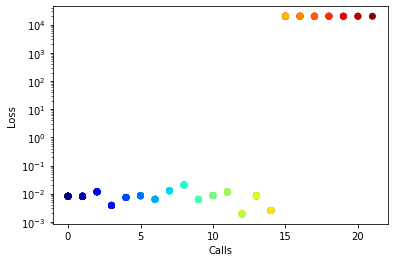

motors ['hkb_1'] trans [-0.01816629] current loss 0.0038208433821677293
motors ['hkb_1'] trans [-0.00197149] current loss 0.0073330704112939855
motors ['hkb_1'] trans [0.00235377] current loss 0.008443229045704057
motors ['hkb_1'] trans [-0.00426235] current loss 0.006312257864294304
motors ['hkb_1'] trans [-0.04368188] current loss 0.012743557969163738
motors ['hkb_1'] trans [0.03430437] current loss 0.02054389862445074
motors ['hkb_1'] trans [-0.00436382] current loss 0.006248870225756641
motors ['hkb_1'] trans [0.0035019] current loss 0.008630283171997143
motors ['hkb_1'] trans [0.02030278] current loss 0.011444995667695647
motors ['hkb_1'] trans [-0.01400434] current loss 0.0019087481222281454
motors ['hkb_1'] trans [-0.03005545] current loss 0.008349719278196544
motors ['hkb_1'] trans [-0.01166669] current loss 0.002525108681875349


/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/beamline34IDC/simulation/shadow/bender.py:148: RuntimeWarning: invalid value encountered in sqrt
  gamma = (-b + numpy.sqrt(b ** 2 - 4 * a * c)) / (2 * a)


motors ['hkb_1'] trans [0.05] current loss 20000.0
motors ['hkb_1'] trans [0.03086429] current loss 20000.0
motors ['hkb_1'] trans [0.03623991] current loss 20000.0
motors ['hkb_1'] trans [0.03428608] current loss 20000.0
motors ['hkb_1'] trans [-0.00735536] current loss 20000.0
motors ['hkb_1'] trans [-0.0341437] current loss 20000.0
motors ['hkb_1'] trans [0.00516233] current loss 20000.0
Loss is 0.0019087481222281454 for x [-0.014004344341619956] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [-0.014004344341619956]
Trying Nelder-Mead from minimum position
Initial loss is 0.00804977640860867
initial guess is [-0.01400434]


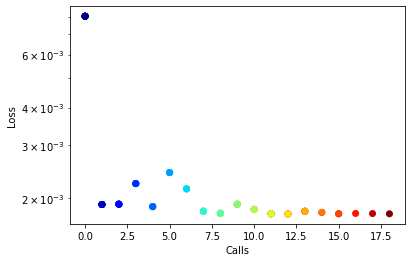

[ final_simplex: (array([[-0.01356671],
       [-0.01356671]]), array([0.0017715 , 0.00177319]))
           fun: 0.0017714976717004044
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([-0.01356671])]


 40%|████      | 2/5 [02:07<03:11, 63.68s/it]

Test 1 success True
Random guess [-0.0010518638479248138] has loss 0.0020769900097694677
Initial motor position is [0.24899964]
Initial loss is 0.0020769900097694677
motors ['hkb_1'] trans [-0.04002391] current loss 0.016067252769181792


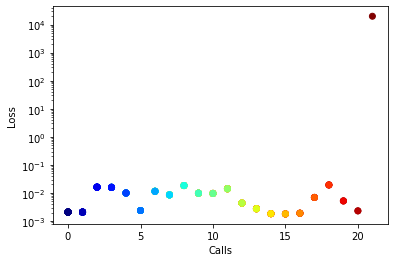

motors ['hkb_1'] trans [-0.03914049] current loss 0.015815145838789228
motors ['hkb_1'] trans [0.02221667] current loss 0.009942168245096004
motors ['hkb_1'] trans [-0.00219673] current loss 0.0023638516377481097
motors ['hkb_1'] trans [0.03278279] current loss 0.011409765118739605
motors ['hkb_1'] trans [0.01579156] current loss 0.008527621700870446
motors ['hkb_1'] trans [0.04536296] current loss 0.018361903315789938
motors ['hkb_1'] trans [-0.02137633] current loss 0.009810690582535376
motors ['hkb_1'] trans [0.02091388] current loss 0.009598472735059845
motors ['hkb_1'] trans [-0.03388273] current loss 0.01409992171887666
motors ['hkb_1'] trans [-0.00655323] current loss 0.004351119465336571
motors ['hkb_1'] trans [0.00159986] current loss 0.0027309430762660495
motors ['hkb_1'] trans [-0.001002] current loss 0.0018232961697270977
motors ['hkb_1'] trans [-0.00088192] current loss 0.0017851777538513151
motors ['hkb_1'] trans [-0.00047175] current loss 0.001891540814407561
motors ['hk

/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/beamline34IDC/simulation/shadow/bender.py:148: RuntimeWarning: invalid value encountered in sqrt
  gamma = (-b + numpy.sqrt(b ** 2 - 4 * a * c)) / (2 * a)


motors ['hkb_1'] trans [0.04999856] current loss 20000.0
Loss is 0.0017851777538513151 for x [-0.0008819169987595854] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [-0.0008819169987595854]
Trying Nelder-Mead from minimum position
Initial loss is 0.002076989766006225
initial guess is [-0.00088192]


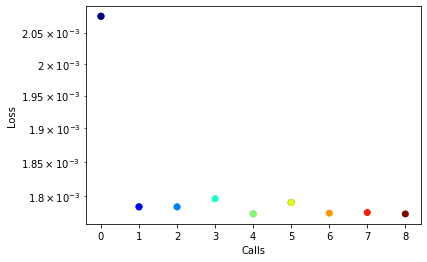

[ final_simplex: (array([[-0.00083782],
       [-0.00083782]]), array([0.00177517, 0.00177523]))
           fun: 0.00177517064853425
       message: 'Optimization terminated successfully.'
          nfev: 7
           nit: 3
        status: 0
       success: True
             x: array([-0.00083782])]


 60%|██████    | 3/5 [03:01<01:58, 59.32s/it]

Test 2 success True
Random guess [0.014209897921214878] has loss 0.008437868497933812
Initial motor position is [0.2642614]
Initial loss is 0.008437868497933812
motors ['hkb_1'] trans [0.02738943] current loss 0.014953782934972702


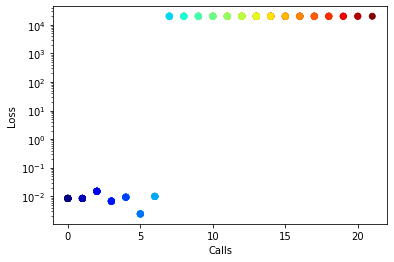

motors ['hkb_1'] trans [-0.00592519] current loss 0.0067849224985381314
motors ['hkb_1'] trans [0.00429192] current loss 0.009294579176913304
motors ['hkb_1'] trans [-0.01761329] current loss 0.002423248091939634
motors ['hkb_1'] trans [-0.03695921] current loss 0.009929457407849573


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow_advanced_tools/widgets/optical_elements/bl/double_rod_bendable_ellispoid_mirror_bl.py:236: RuntimeWarning: invalid value encountered in sqrt
  sv = 2*fprime*K0id*((2 * nu * (y / fprime) + mu) / numpy.sqrt(1 - mu * (y / fprime) - nu * (y / fprime) ** 2) - mu)
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow_advanced_tools/widgets/optical_elements/bl/double_rod_bendable_ellispoid_mirror_bl.py:275: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  profile[i] = integrate.quad(func=(lambda x: __calculate_ideal_slope_variation(x, fprime, K0id, mu, nu)), a=y[0], b=y[i])[0]


motors ['hkb_1'] trans [0.03256243] current loss 20000.0
motors ['hkb_1'] trans [-0.00148906] current loss 20000.0
motors ['hkb_1'] trans [-0.04753995] current loss 20000.0


/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/beamline34IDC/simulation/shadow/bender.py:148: RuntimeWarning: invalid value encountered in sqrt
  gamma = (-b + numpy.sqrt(b ** 2 - 4 * a * c)) / (2 * a)


motors ['hkb_1'] trans [0.04740322] current loss 20000.0
motors ['hkb_1'] trans [-0.04298179] current loss 20000.0
motors ['hkb_1'] trans [-0.01762456] current loss 20000.0
motors ['hkb_1'] trans [-0.03690488] current loss 20000.0
motors ['hkb_1'] trans [0.0129953] current loss 20000.0
motors ['hkb_1'] trans [0.00429204] current loss 20000.0
motors ['hkb_1'] trans [0.02738908] current loss 20000.0
motors ['hkb_1'] trans [-0.00592639] current loss 20000.0
motors ['hkb_1'] trans [-0.03700615] current loss 20000.0
motors ['hkb_1'] trans [-0.01760466] current loss 20000.0
motors ['hkb_1'] trans [0.00429196] current loss 20000.0
motors ['hkb_1'] trans [0.02738928] current loss 20000.0
Loss is 0.002423248091939634 for x [-0.017613291609785163] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [-0.017613291609785163]
Trying Nelder-Mead from minimum position
Initial loss is 0.008441143736468412
initial guess is [-0.01761329]


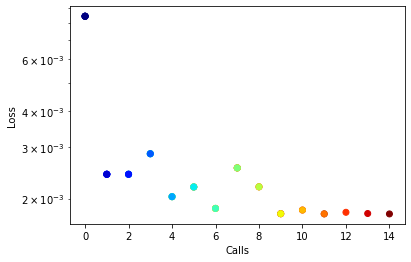

[ final_simplex: (array([[-0.01612717],
       [-0.01612717]]), array([0.00177156, 0.00177234]))
           fun: 0.0017715639490973008
       message: 'Optimization terminated successfully.'
          nfev: 13
           nit: 6
        status: 0
       success: True
             x: array([-0.01612717])]


 80%|████████  | 4/5 [03:46<00:53, 53.72s/it]

Test 3 success True
Random guess [-0.00556936285404077] has loss 0.0034094911438610253
Initial motor position is [0.24448214]
Initial loss is 0.0034094911438610253
motors ['hkb_1'] trans [0.04474473] current loss 0.01250043947787022


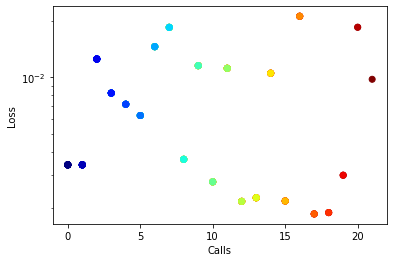

motors ['hkb_1'] trans [0.0184477] current loss 0.008230902422633496
motors ['hkb_1'] trans [-0.00948834] current loss 0.007175165043963004
motors ['hkb_1'] trans [0.01290267] current loss 0.006249354635555367
motors ['hkb_1'] trans [-0.03069507] current loss 0.01454889555922192
motors ['hkb_1'] trans [-0.04288625] current loss 0.018440329951650892
motors ['hkb_1'] trans [-0.00051678] current loss 0.003648655082226587
motors ['hkb_1'] trans [0.03825797] current loss 0.01152325083074899
motors ['hkb_1'] trans [0.0014354] current loss 0.0027669357718012808
motors ['hkb_1'] trans [0.03475621] current loss 0.011156799844703443
motors ['hkb_1'] trans [0.00272733] current loss 0.0021774740510488205
motors ['hkb_1'] trans [0.0050288] current loss 0.0022763736091020404
motors ['hkb_1'] trans [-0.01883639] current loss 0.010503105761527472
motors ['hkb_1'] trans [0.00480298] current loss 0.0021880359154559225
motors ['hkb_1'] trans [-0.04999364] current loss 0.02113734658147395
motors ['hkb_1']

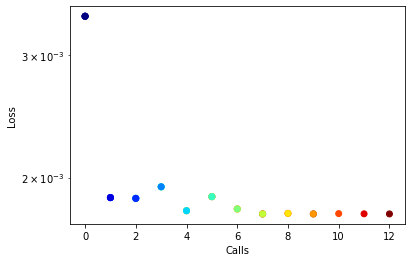

[ final_simplex: (array([[0.00371562],
       [0.00371562]]), array([0.00177309, 0.00177309]))
           fun: 0.0017730944095741025
       message: 'Optimization terminated successfully.'
          nfev: 11
           nit: 5
        status: 0
       success: True
             x: array([0.00371562])]


100%|██████████| 5/5 [04:50<00:00, 58.03s/it]

Test 4 success True


In [120]:
N_RUNS = 5

initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []



for outer in tqdm(range(N_RUNS)):
    focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)
    opt_trial = SkoptGaussianProcessOptimizer(focusing_system, 
                                              motor_types=move_motors, 
                                              random_seed=DEFAULT_RANDOM_SEED, 
                                              loss_parameters=['centroid', 'fwhm'],
                                              loss_min_value=5e-4,
                                              use_gaussian_fit=True)
    random_inits = opt_trial.get_random_init()
    
    absolute_movements.append(initial_absolute_positions + random_inits)
    
    print("Initial motor position is", absolute_movements[-1])
    opt_trial.initial_motor_positions =  absolute_movements[-1]
    #deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'] / configs.DEFAULT_MOTOR_RESOLUTIONS['hkb_4'])
    #deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_optimizer_options(callback = [plot_callback.call], xi=5e-4, kappa=0.1, n_calls=20, bounds=[-0.05, 0.05])
    opt_results, guesses, solution, success = opt_trial.trials(verbose=True)
    print("Solution is", solution)
    plot_callback.close()
    
    if not success:
        print('Trying Nelder-Mead from minimum position')
        focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                             absolute_movements[-1],
                                             movement='absolute')
        opt_trial = ScipyOptimizer(focusing_system, 
                                   motor_types=move_motors, 
                                   random_seed=DEFAULT_RANDOM_SEED, 
                                   loss_parameters=['centroid', 'fwhm'],
                                   loss_min_value=5e-4,
                                   use_gaussian_fit=True)
        plot_callback = LivePlotCallback(opt_trial)
        opt_trial.set_optimizer_options(callback = plot_callback.call)
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=solution[0],
                                                                   verbose=False, 
                                                                   accept_all_solutions=True)
        focusing_system = opt_trial.focusing_system
        plot_callback.close()
        print(opt_results)
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

In [124]:
initial_out_beams = []
initial_hists = []
initial_dws = []
for mov in absolute_movements:
    focusing_system = movers.move_motors(focusing_system, move_motors, mov, movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system=focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    initial_out_beams.append(beam)
    initial_hists.append(hist)
    initial_dws.append(dw)

In [125]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [126]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [127]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

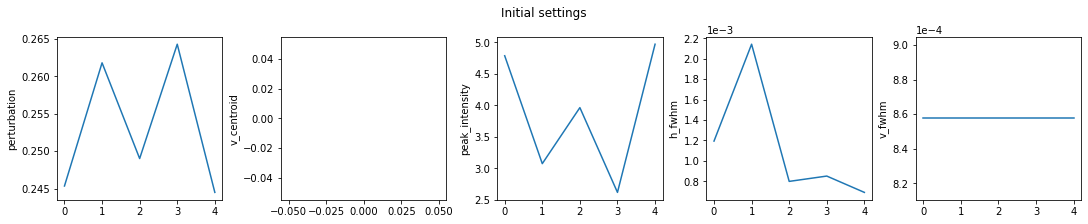

In [128]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/initial_metrics.png', bbox_inches='tight')

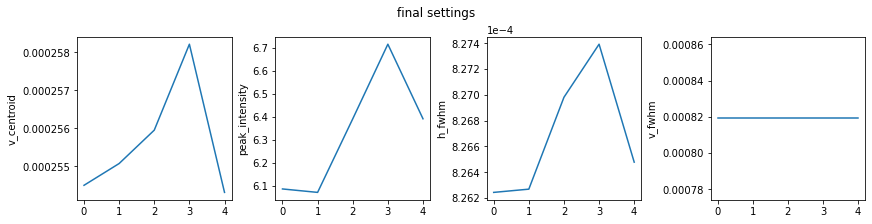

In [129]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/final_metrics.png', bbox_inches='tight')

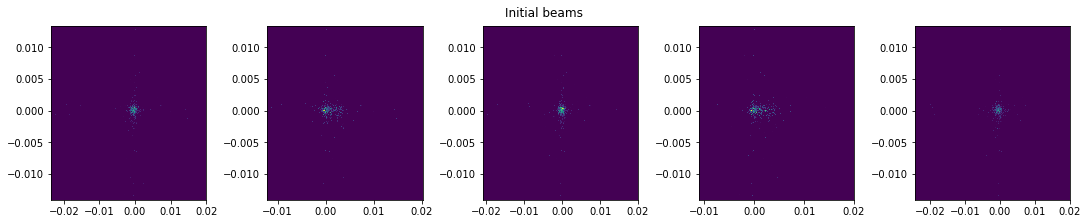

In [130]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/initial_beams.png', bbox_inches='tight')

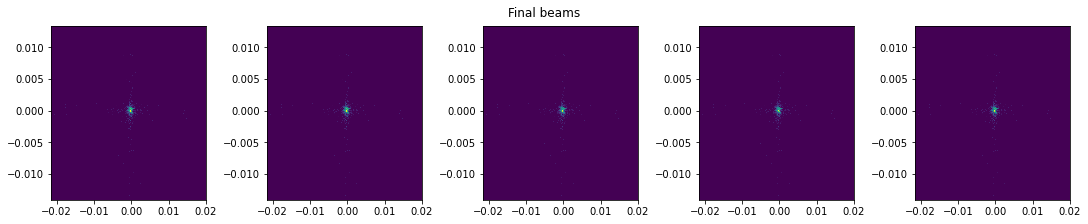

In [131]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/final_beams.png', bbox_inches='tight')

In [132]:
clean_up()